In [75]:
PATH = r"/Users/andryha/Desktop/Medialab/MPI_POLUS/MPI/"

In [76]:
import os
import pandas as pd
import numpy as np

In [77]:
df = pd.DataFrame(columns=[1, 2, 4, 8, 16, 32, 64], index=[i * 100000000 for i in range(1, 11)])

In [78]:
for items in os.listdir(PATH):
    if not '.out' in items:
        continue
    with open(os.path.join(PATH, items),"r") as f:
        data = f.read()
        data = data[data.find('#N of intervals:'):data.find('PS:')]
        num_of_intervals = int(data[len('#N of intervals:'): data.find('\n') + 1])
        num_of_cores = int(data[data.find('\n') + len('#N of cores: ') + 1: data.find('TIME:')])
        time = float(data[data.find('TIME:') + len('TIME: '):])
        #if not df[num_of_cores][num_of_intervals] is np.nan:
        if not df[num_of_cores][num_of_intervals] is np.nan:
            df[num_of_cores][num_of_intervals] += time / 3.
        else:
            df[num_of_cores][num_of_intervals] = time / 3.

In [79]:
df

,1,2,4,8,16,32,64
100000000,44.367,22.1635,10.126,5.303,3.06371,1.78749,0.840502
200000000,90.3582,47.5064,19.7345,11.4103,6.42696,4.13002,1.55968
300000000,150.079,69.395,33.953,16.7068,8.66409,5.45898,2.21719
400000000,198.209,82.4864,40.7498,21.416,13.6815,6.817,3.10079
500000000,244.125,106.217,50.4014,30.8399,15.9959,9.26668,3.67917
600000000,284.912,134.515,64.2276,35.6692,18.9701,12.0582,4.46643
700000000,329.12,156.932,71.5672,41.0705,19.2608,13.957,4.78443
800000000,388.077,160.384,83.7299,41.3814,28.6328,16.5743,5.56435
900000000,456.899,179.807,101.676,46.856,29.283,18.5759,6.77783
1000000000,538.339,219.467,106.367,51.1976,34.0679,20.0191,7.15999


<IPython.core.display.Javascript object>


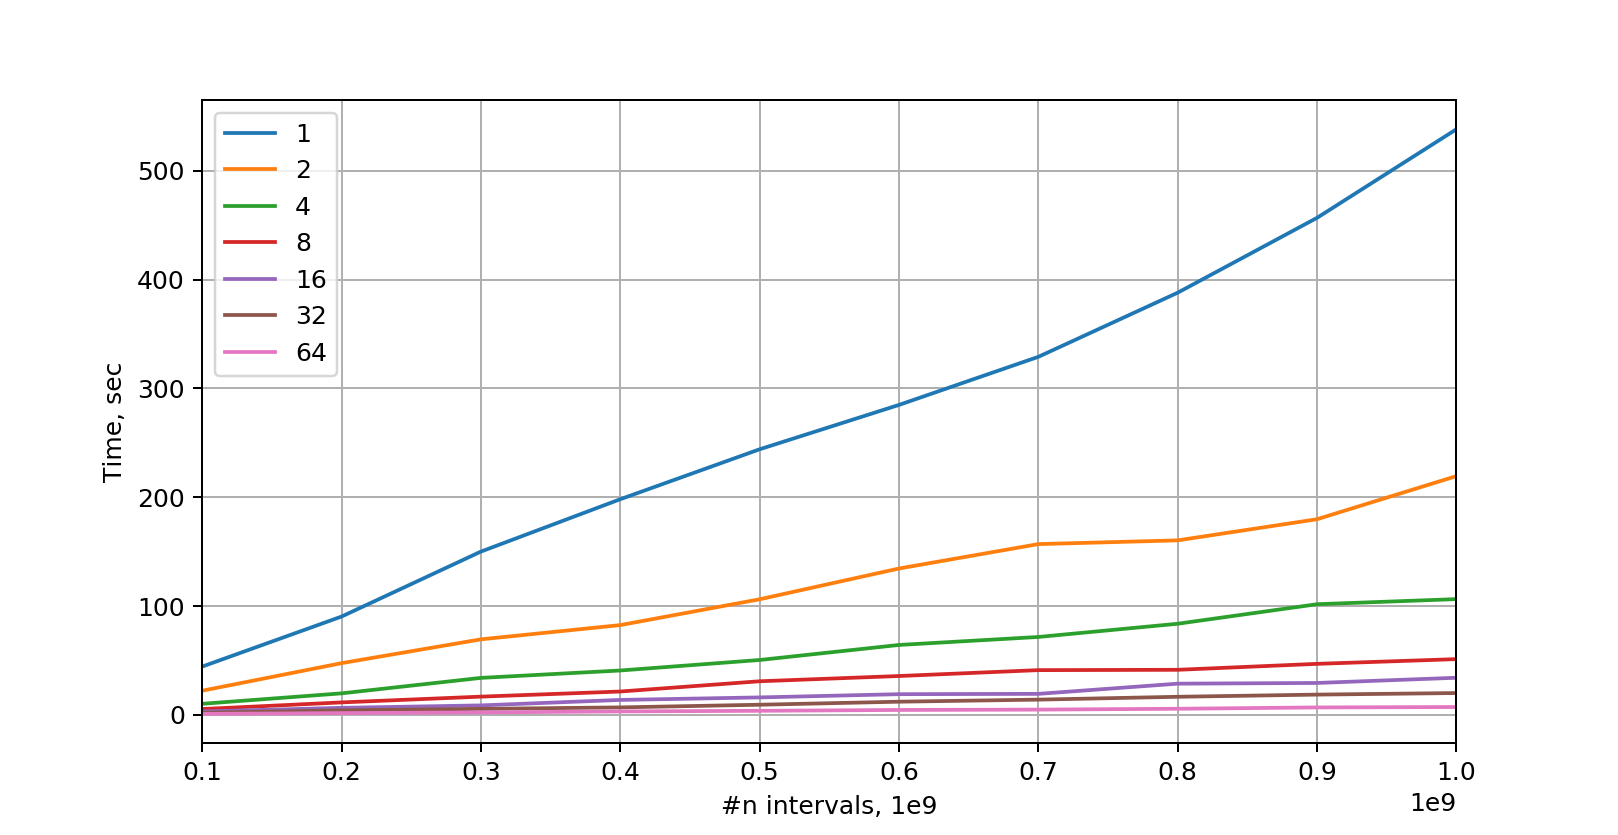

Text(0, 0.5, 'Time, sec')

In [80]:
%matplotlib notebook
import matplotlib.cm as cm
#cm = plt.get_cmap('gist_rainbow')
#colors = [cm(1.*i/11) for i in range(7)]
ax = df.plot(grid=True)
ax.set_xlabel("#n intervals, 1e9")
ax.set_ylabel("Time, sec")

<IPython.core.display.Javascript object>


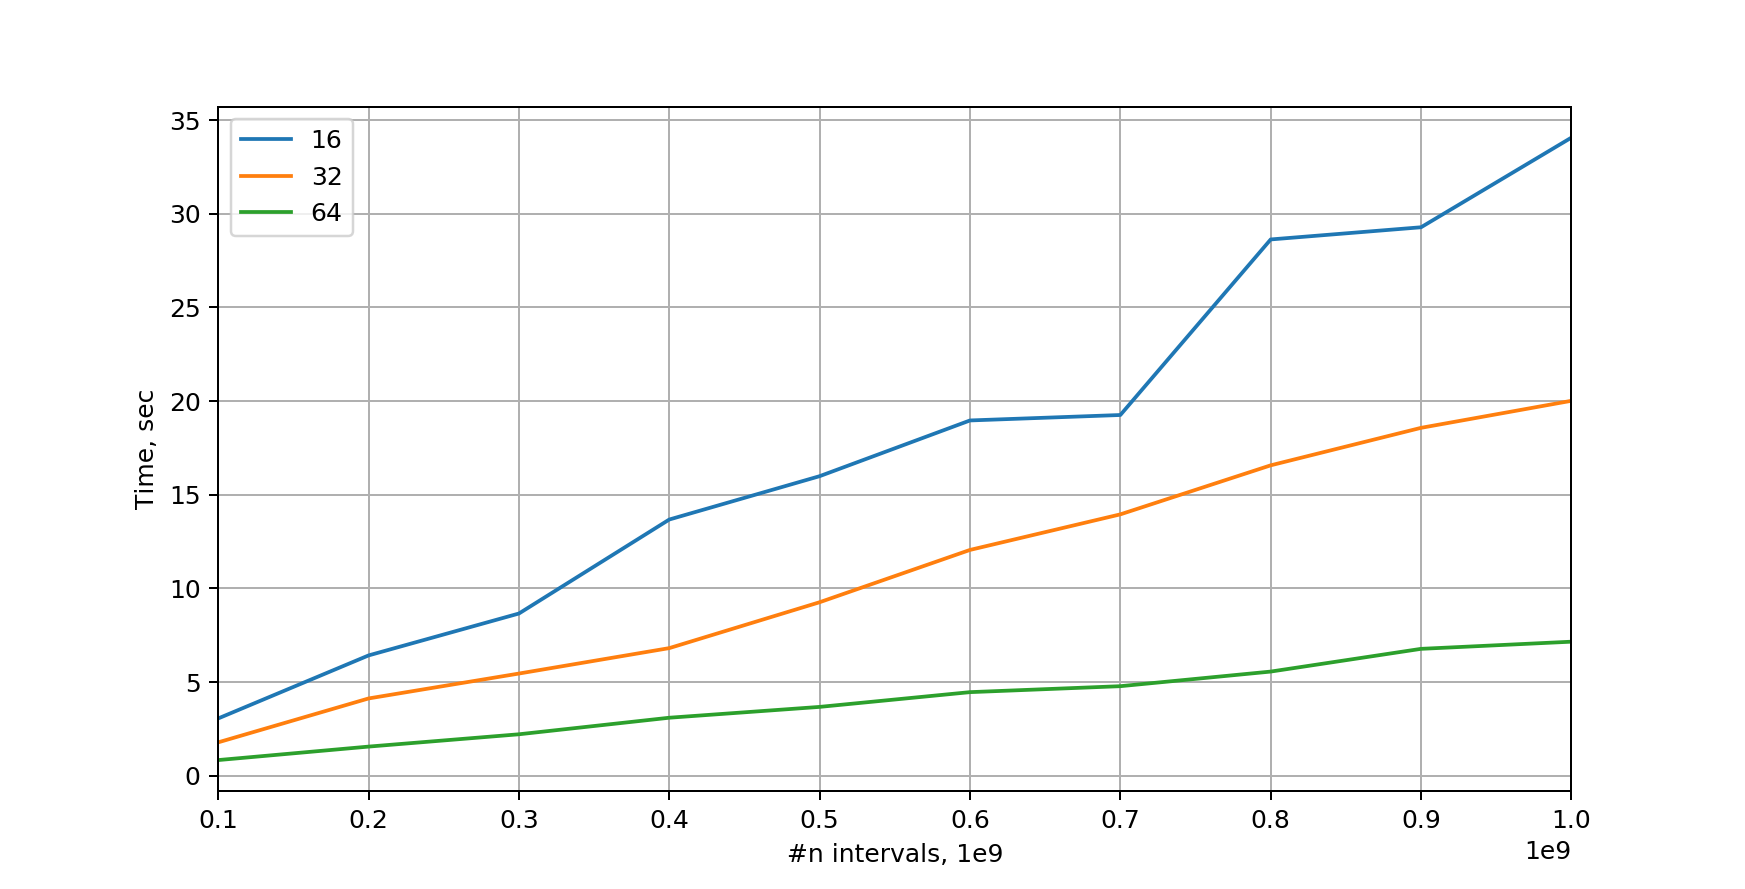

Text(0, 0.5, 'Time, sec')

In [85]:
ax = df.iloc[:, -3:].plot(grid=True)
ax.set_xlabel("#n intervals, 1e9")
ax.set_ylabel("Time, sec")

<IPython.core.display.Javascript object>


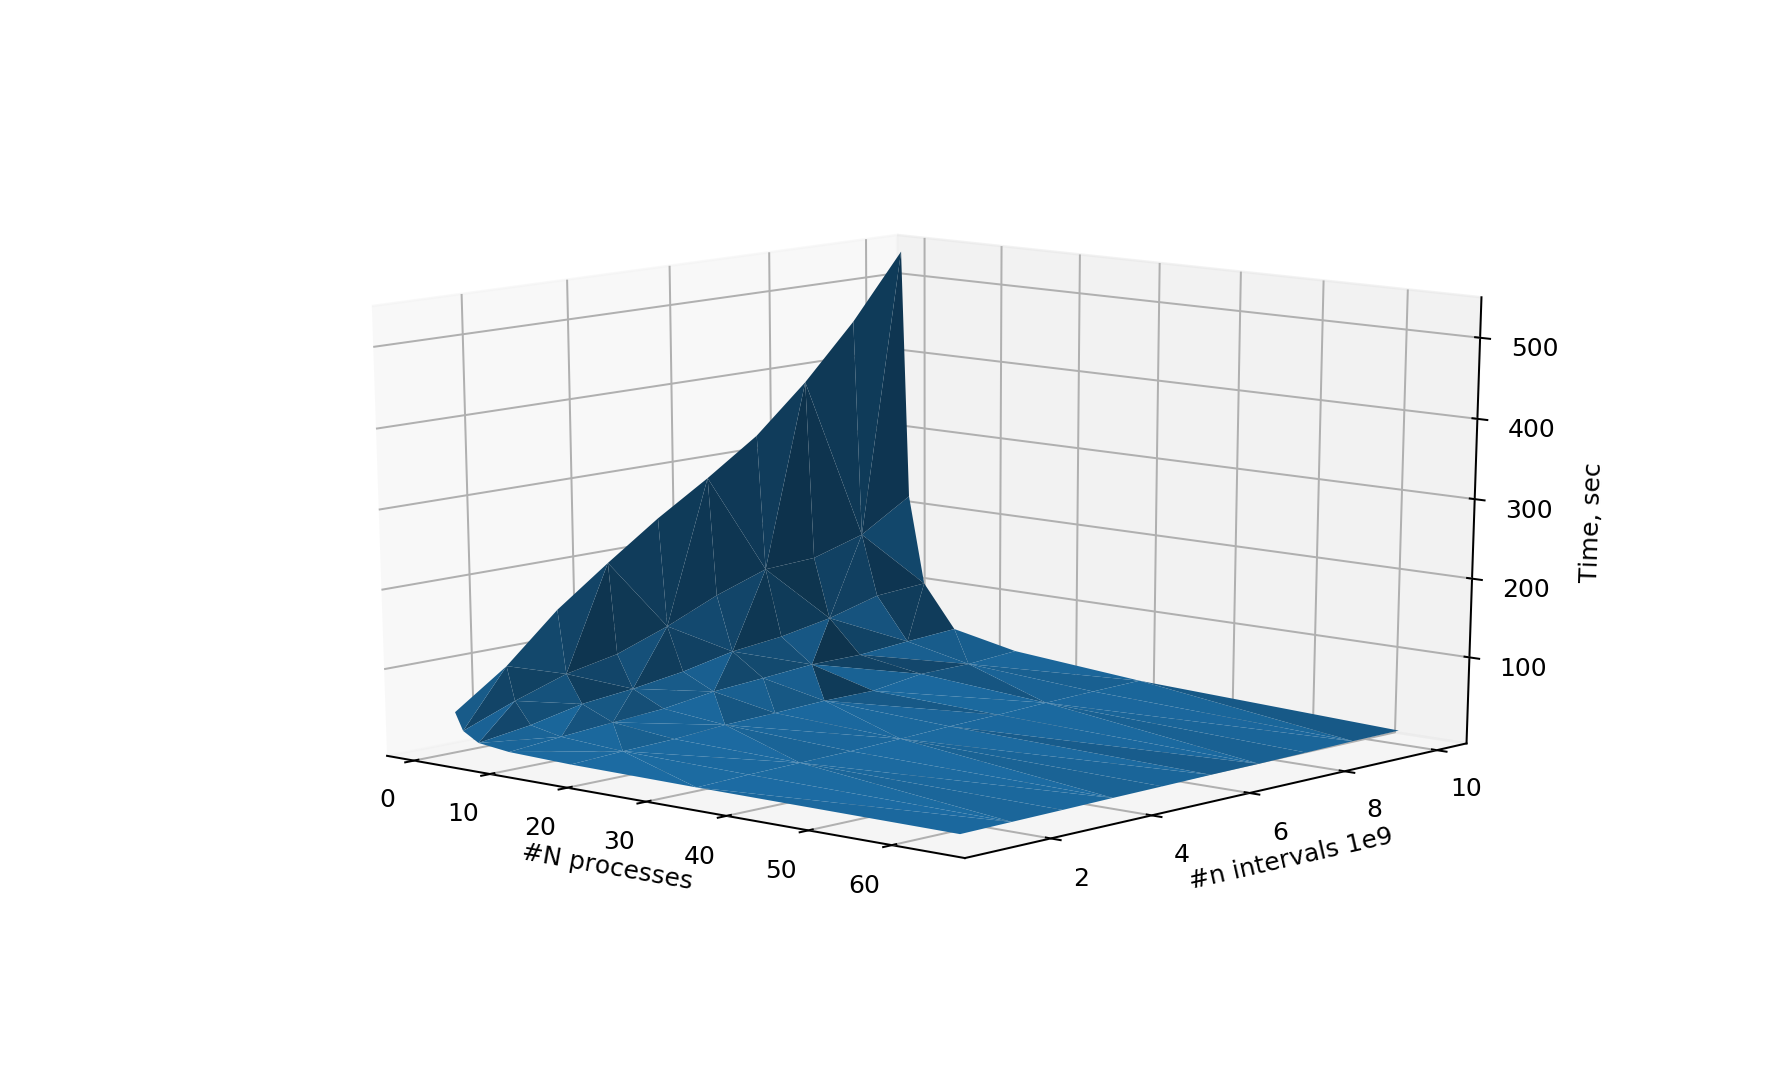

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


NTHREADS = [1, 2, 4, 8, 16, 32, 64]

x = np.tile(NTHREADS, 10)
y = [1] * 7 + [2] * 7 + [3] * 7 + [4] * 7 + [5] * 7 +[6] * 7 + [7] * 7 + [8] * 7 + [9] * 7 + [10] * 7
z = list(df.values.flatten())

ax.plot_trisurf(x, y, z)

ax.set_xlabel('#N processes')
ax.set_ylabel('#n intervals 1e9')
ax.set_zlabel('Time, sec')

plt.show()

<IPython.core.display.Javascript object>


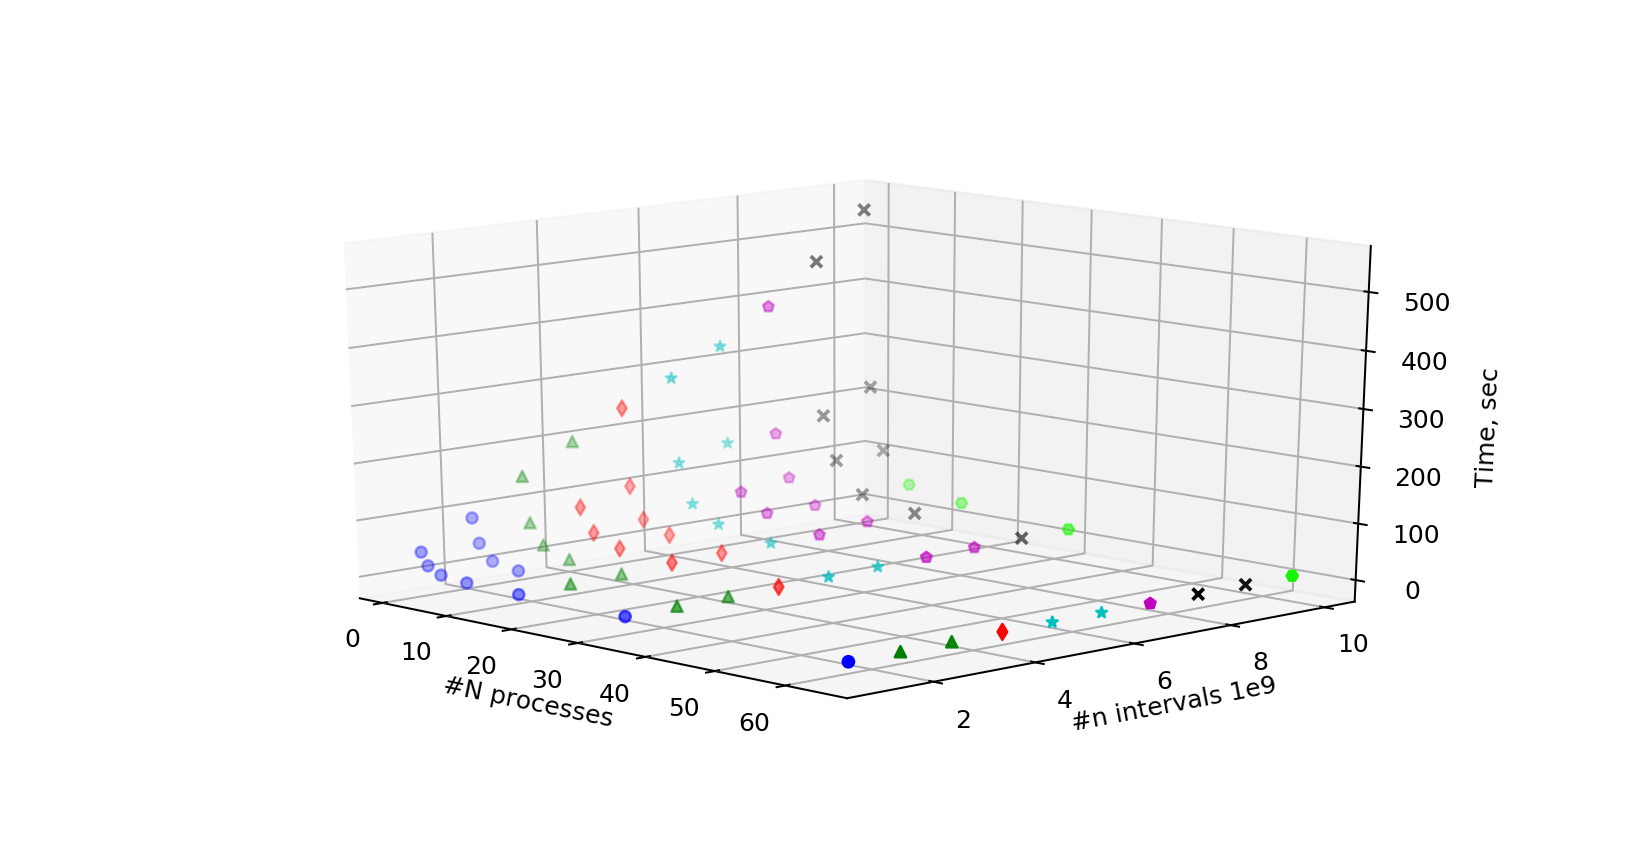

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



colors = ['b', 'g', 'r', 'c', 'm', 'k', '#19f500', '#f100f5', '#00f5e9', 'g', '#383f40', '#a33c9c']
marker = ['o', '^', 'd', '*', 'p', 'x', 'H', '>', 'p', 'o', 'X', 's']
for i in range(0, 10 * 11, 11):
    ax.scatter(x[i:i + 11], y[i:i + 11], z[i:i + 11], c=colors[i // 11], marker=marker[i // 11])

ax.set_xlabel('#N processes')
ax.set_ylabel('#n intervals 1e9')
ax.set_zlabel('Time, sec')

plt.show()